<a href="https://colab.research.google.com/github/WinnieAnyoso/w4_core_ip/blob/master/Moringa_Data_Science_Core_W4_Independent_Project_2020_07_Winnie_Anyoso_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

 A claim for example will be;
 - is the number of cars taken over the weekdays the same to that of those taken over the weekend? 
 -Is the number of cars taken in the first two days equal to that taken in the last two days of the week? 

 The data set and variable definitions can be found below
 - http://bit.ly/DSCoreAutolibDataset
 - http://bit.ly/DSCoreAutolibDatasetGlossary

Below is a report giving detail concerning the analyses and the hypothesis tests below
https://docs.google.com/document/d/1uY4YGoiddYMIlrvhp4vBo82SHKyOXrY5Kw86-V-oYq4/edit?usp=sharing



> # 1. Importing Libraries and loading the data sets. 



In [ ]:
# importing necessary libraries

import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Loading the dataset(s)
df = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")
df.sample(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
3049,75020,3/30/2018,1434,4,weekday,512,477,10,10,43,43,140,128
4525,92100,1/4/2018,1320,3,weekday,305,312,3,5,18,17,13,13
14907,94410,3/14/2018,1440,2,weekday,20,24,0,1,4,3,0,0
8425,92370,1/17/2018,1440,2,weekday,21,29,2,1,3,1,0,0
3302,75116,1/27/2018,1440,5,weekend,15,18,0,0,3,3,4,4
7377,92300,2/18/2018,1438,6,weekend,169,171,1,1,4,5,0,0
15917,95870,6/8/2018,1438,4,weekday,14,10,0,0,2,1,0,0
14955,94410,5/1/2018,1440,1,weekday,30,28,0,0,4,3,0,0
12596,93600,4/11/2018,1439,2,weekday,12,13,0,0,2,1,0,0
11054,93260,1/31/2018,1440,2,weekday,35,36,0,0,4,2,3,3


In [ ]:
# Loading decription file 
df1 = pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')
df1

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area




> # 2. Data Exploration



In [ ]:
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
df.shape

(16085, 13)

In [ ]:
df.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

* There are no null values.

In [ ]:
df.duplicated().any()

False

* There are no duplicate values

In [ ]:
len(df)

16085

* There 16085 rows


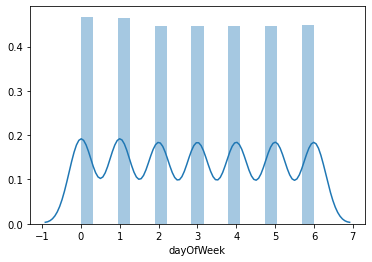

In [ ]:
# distribution plot for the day of the week
sns.distplot(df['dayOfWeek']);


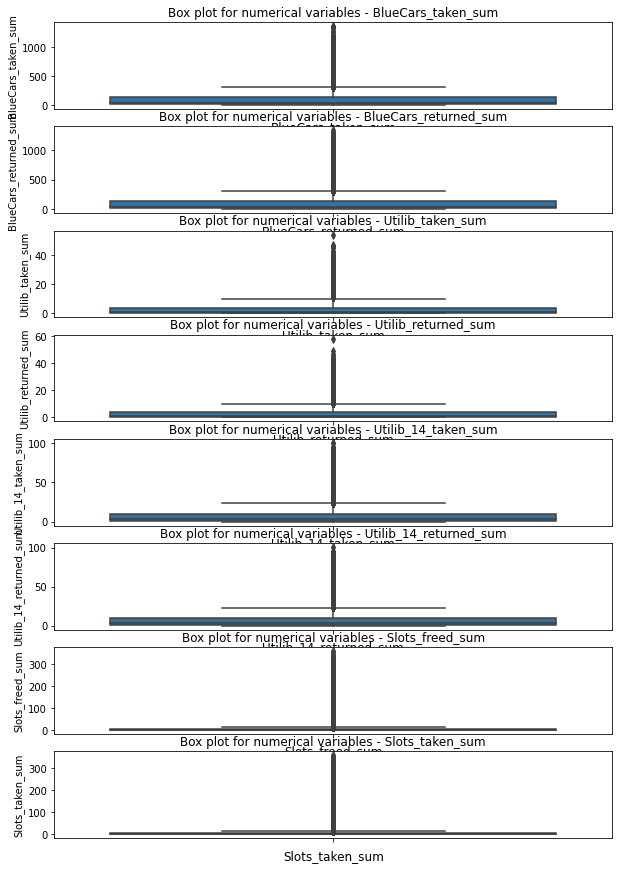

In [ ]:
# checking for anomalies.

numerical_columns = ['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']

fig, ax = plt.subplots(len(numerical_columns), figsize=(10,15))

for i, col_val in enumerate(numerical_columns):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

The box plots above reveal that all the data is skewed to the right, with all of the numerical values containing outliers. In this case, some of the outliers could be a true value recorded or as a result of error during data entry.

In [ ]:
#dealing with anomalies

# 1. find the interquatile range 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

#res_outliers = ((df.respondent_age < Q1 - 1.5 * IQR) | (df.respondent_age > Q3 + 1.5 * IQR))
#res_outliers.value_counts()

Postal code               2070.0
n_daily_data_points          1.0
dayOfWeek                    4.0
BlueCars_taken_sum         115.0
BlueCars_returned_sum      115.0
Utilib_taken_sum             4.0
Utilib_returned_sum          4.0
Utilib_14_taken_sum          9.0
Utilib_14_returned_sum       9.0
Slots_freed_sum              5.0
Slots_taken_sum              5.0
dtype: float64


In [ ]:

df_r = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(df_r)


       Postal code       date  ...  Slots_freed_sum  Slots_taken_sum
3899         91330   1/1/2018  ...                4                2
3900         91330   1/2/2018  ...                0                0
3901         91330   1/3/2018  ...                1                1
3903         91330   1/5/2018  ...                1                1
3905         91330   1/7/2018  ...                4                2
...            ...        ...  ...              ...              ...
16079        95880  6/14/2018  ...                0                0
16080        95880  6/15/2018  ...                0                0
16081        95880  6/16/2018  ...                0                0
16082        95880  6/17/2018  ...                0                0
16083        95880  6/18/2018  ...                0                0

[9783 rows x 13 columns]


In [ ]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [ ]:
numerical_columns = ['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum']
categorical_columns = ["dayOfWeek", "day_type"]  
       
print(numerical_columns)

print("*************************************")

print(categorical_columns)

['BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']
*************************************
['dayOfWeek', 'day_type']


In [ ]:
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64



> # 3. EDA


> # Univariate Analysis





In [ ]:
# mean 
for column in numerical_columns:
  print('\n')
  print(column + ': ' + str(df[column].mean()))



BlueCars_taken_sum: 125.92695057506994


BlueCars_returned_sum: 125.912713708424


Utilib_taken_sum: 3.69829033260802


Utilib_returned_sum: 3.6990985390115014


Utilib_14_taken_sum: 8.600559527510102


Utilib_14_returned_sum: 8.599191793596518


Slots_freed_sum: 22.62903326080199


Slots_taken_sum: 22.629281939695367


In [ ]:
# median
for column in numerical_columns:
  print('\n')
  print(column + ': ' + str(df[column].median()))



BlueCars_taken_sum: 46.0


BlueCars_returned_sum: 46.0


Utilib_taken_sum: 1.0


Utilib_returned_sum: 1.0


Utilib_14_taken_sum: 3.0


Utilib_14_returned_sum: 3.0


Slots_freed_sum: 0.0


Slots_taken_sum: 0.0


In [ ]:
# interquatile ranges 
for column in numerical_columns:
  print('\n')
  print(df[column].quantile([0.25, 0.5, 0.75]))




0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_taken_sum, dtype: float64


0.25     20.0
0.50     46.0
0.75    135.0
Name: BlueCars_returned_sum, dtype: float64


0.25    0.0
0.50    1.0
0.75    4.0
Name: Utilib_taken_sum, dtype: float64


0.25    0.0
0.50    1.0
0.75    4.0
Name: Utilib_returned_sum, dtype: float64


0.25     1.0
0.50     3.0
0.75    10.0
Name: Utilib_14_taken_sum, dtype: float64


0.25     1.0
0.50     3.0
0.75    10.0
Name: Utilib_14_returned_sum, dtype: float64


0.25    0.0
0.50    0.0
0.75    5.0
Name: Slots_freed_sum, dtype: float64


0.25    0.0
0.50    0.0
0.75    5.0
Name: Slots_taken_sum, dtype: float64


In [ ]:
# Standard deviation, Variance, Skewness and Kurtosis
for column in numerical_columns:
  print('\n')
  print(column + ', std: '+ str(df[column].std()))
  print(column + ', var: '+ str(df[column].var()))
  print(column + ', skew: '+ str(df[column].skew()))
  print(column + ', kurtosis: '+ str(df[column].kurt()))



BlueCars_taken_sum, std: 185.42657876727893
BlueCars_taken_sum, var: 34383.01611333789
BlueCars_taken_sum, skew: 2.4063548974959086
BlueCars_taken_sum, kurtosis: 6.172692305510042


BlueCars_returned_sum, std: 185.50153480148427
BlueCars_returned_sum, var: 34410.819413706275
BlueCars_returned_sum, skew: 2.412084978838923
BlueCars_returned_sum, kurtosis: 6.1862880957582345


Utilib_taken_sum, std: 5.815057779367249
Utilib_taken_sum, var: 33.81489697737956
Utilib_taken_sum, skew: 2.5568719194754777
Utilib_taken_sum, kurtosis: 7.702361895243428


Utilib_returned_sum, std: 5.824634228651658
Utilib_returned_sum, var: 33.9263638975805
Utilib_returned_sum, skew: 2.57866477971619
Utilib_returned_sum, kurtosis: 7.93635700780893


Utilib_14_taken_sum, std: 12.870098297095637
Utilib_14_taken_sum, var: 165.63943017690403
Utilib_14_taken_sum, skew: 2.5109244534822923
Utilib_14_taken_sum, kurtosis: 7.18681525579947


Utilib_14_returned_sum, std: 12.868992936610336
Utilib_14_returned_sum, var: 165.

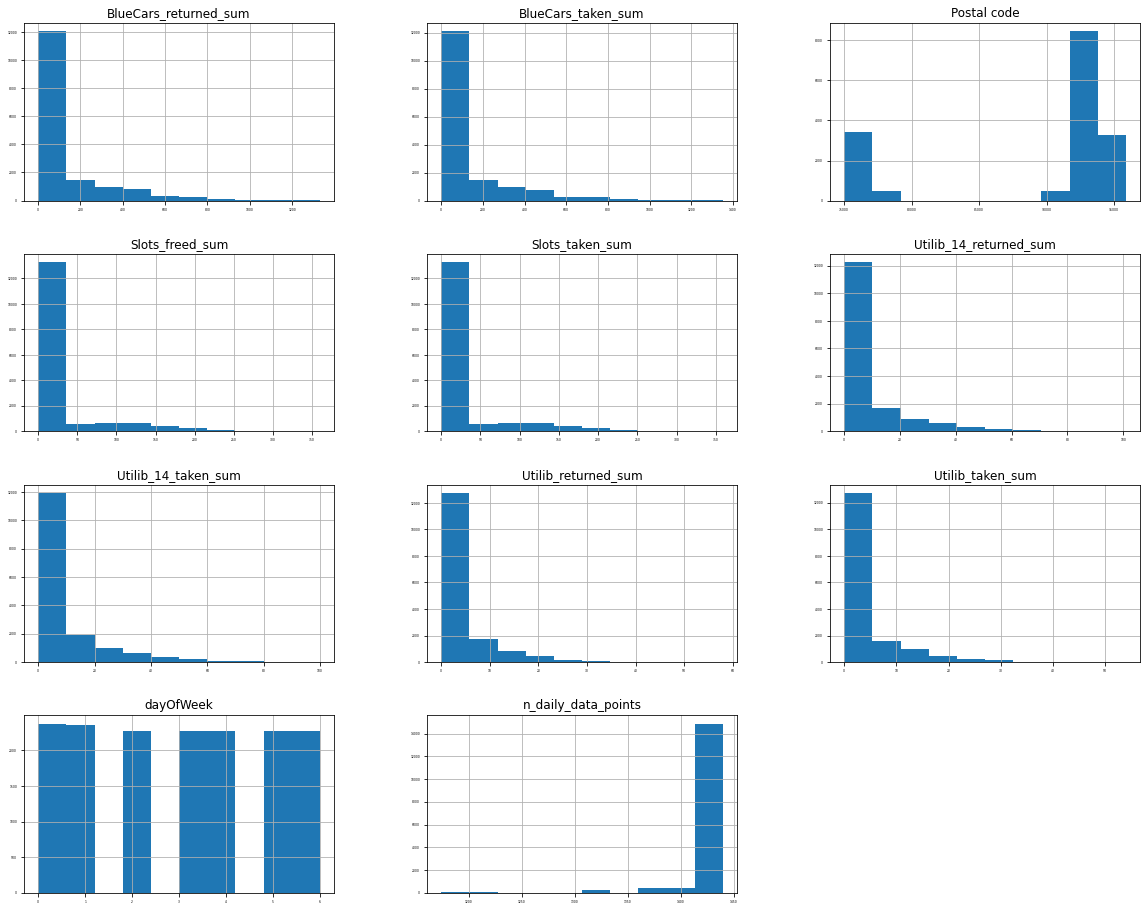

In [ ]:
# plottitng histograms 
df.hist(figsize=(20,16), sharex=False, sharey=False, xlabelsize=3, ylabelsize=3)
plt.show()

- All columns have data that are skewed to the right except for n_daily_data_points that is skewed to the left and day of the week which is uniformly skewed. 

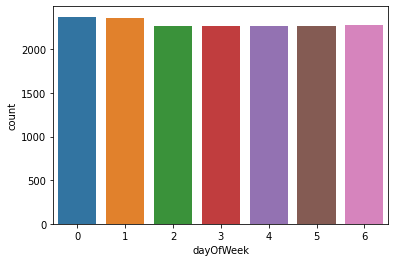

In [ ]:
# ploting the count ie the number of times there was a record made. 
sns.countplot(df['dayOfWeek'])

* Monday and Tuesday had the highest number of recorded events with the rest of the week having an almost similar number of records

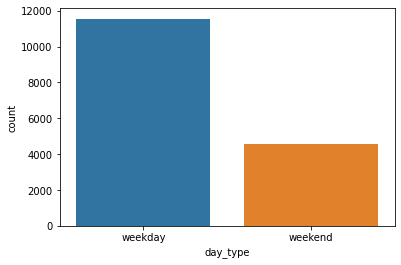

In [ ]:
sns.countplot(df['day_type'])

-There were more weekday records than that of the weekends 


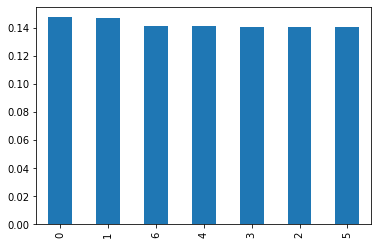

In [ ]:
(df['dayOfWeek'].value_counts().head(10)/len(df)).plot.bar()

* The curve displays that as we tend to move towards the end of the week the number of cars taken decreases gradually. 

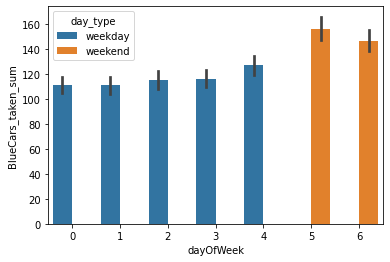

In [ ]:
#Creating subplot for blue cars taken 

sns.barplot(x='dayOfWeek', y='BlueCars_taken_sum', hue ='day_type', data = df)

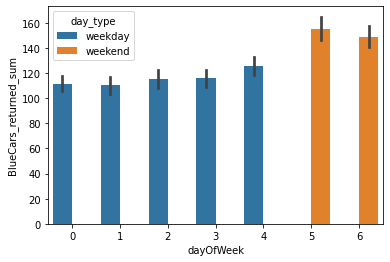

In [ ]:
#Creating subplot for blue cars returned_sum
sns.barplot(x='dayOfWeek', y='BlueCars_returned_sum', hue ='day_type', data = df)

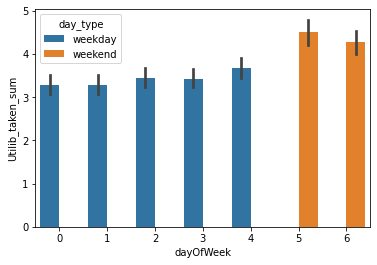

In [ ]:
#Creating subplot for utilib taken sum
sns.barplot(x='dayOfWeek', y='Utilib_taken_sum', hue ='day_type', data = df)

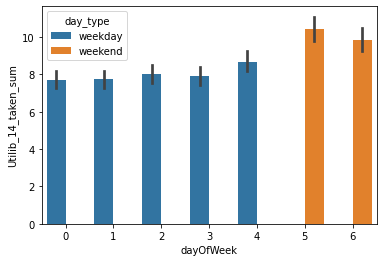

In [ ]:
#Creating subplots utilib 14 taken sum 

sns.barplot(x='dayOfWeek', y='Utilib_14_taken_sum', hue ='day_type', data = df)



> # Bivariate Analysis



In [ ]:
# plotting the correlation matrix for each numerical column;
x = df.corr()
x

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
Postal code,1.000000,0.000432,0.000343,-0.698020,-0.697519,-0.625521,-0.624786,-0.656744,-0.656516,-0.749528,-0.749157
n_daily_data_points,0.000432,1.000000,0.002039,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
dayOfWeek,0.000343,0.002039,1.000000,0.079649,0.081954,0.069295,0.071713,0.068790,0.071279,0.049960,0.050468
BlueCars_taken_sum,-0.698020,0.029411,0.079649,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
BlueCars_returned_sum,-0.697519,0.030063,0.081954,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
Utilib_taken_sum,-0.625521,0.022669,0.069295,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
Utilib_returned_sum,-0.624786,0.023322,0.071713,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
Utilib_14_taken_sum,-0.656744,0.025738,0.068790,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
Utilib_14_returned_sum,-0.656516,0.026351,0.071279,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
Slots_freed_sum,-0.749528,0.020873,0.049960,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221


- The above results reveal that most of the variables are strong positively correlated, with the highest being the correlation between the slots freed sum and that of the slots taken sum. 
-The postal code has a very tiny correlation with most of the correlations with the the other variables being negative. 
-There is a week correlation between daily data points and day of the week and with that of the other variables. 

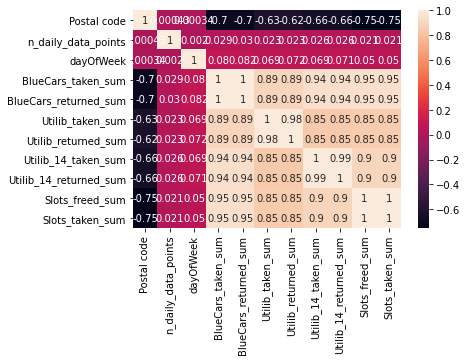

In [ ]:
#here, we use a heatmap to display the results
corelation = df.corr()

sns.heatmap(corelation,xticklabels = corelation.columns, yticklabels = corelation.columns, annot=True)


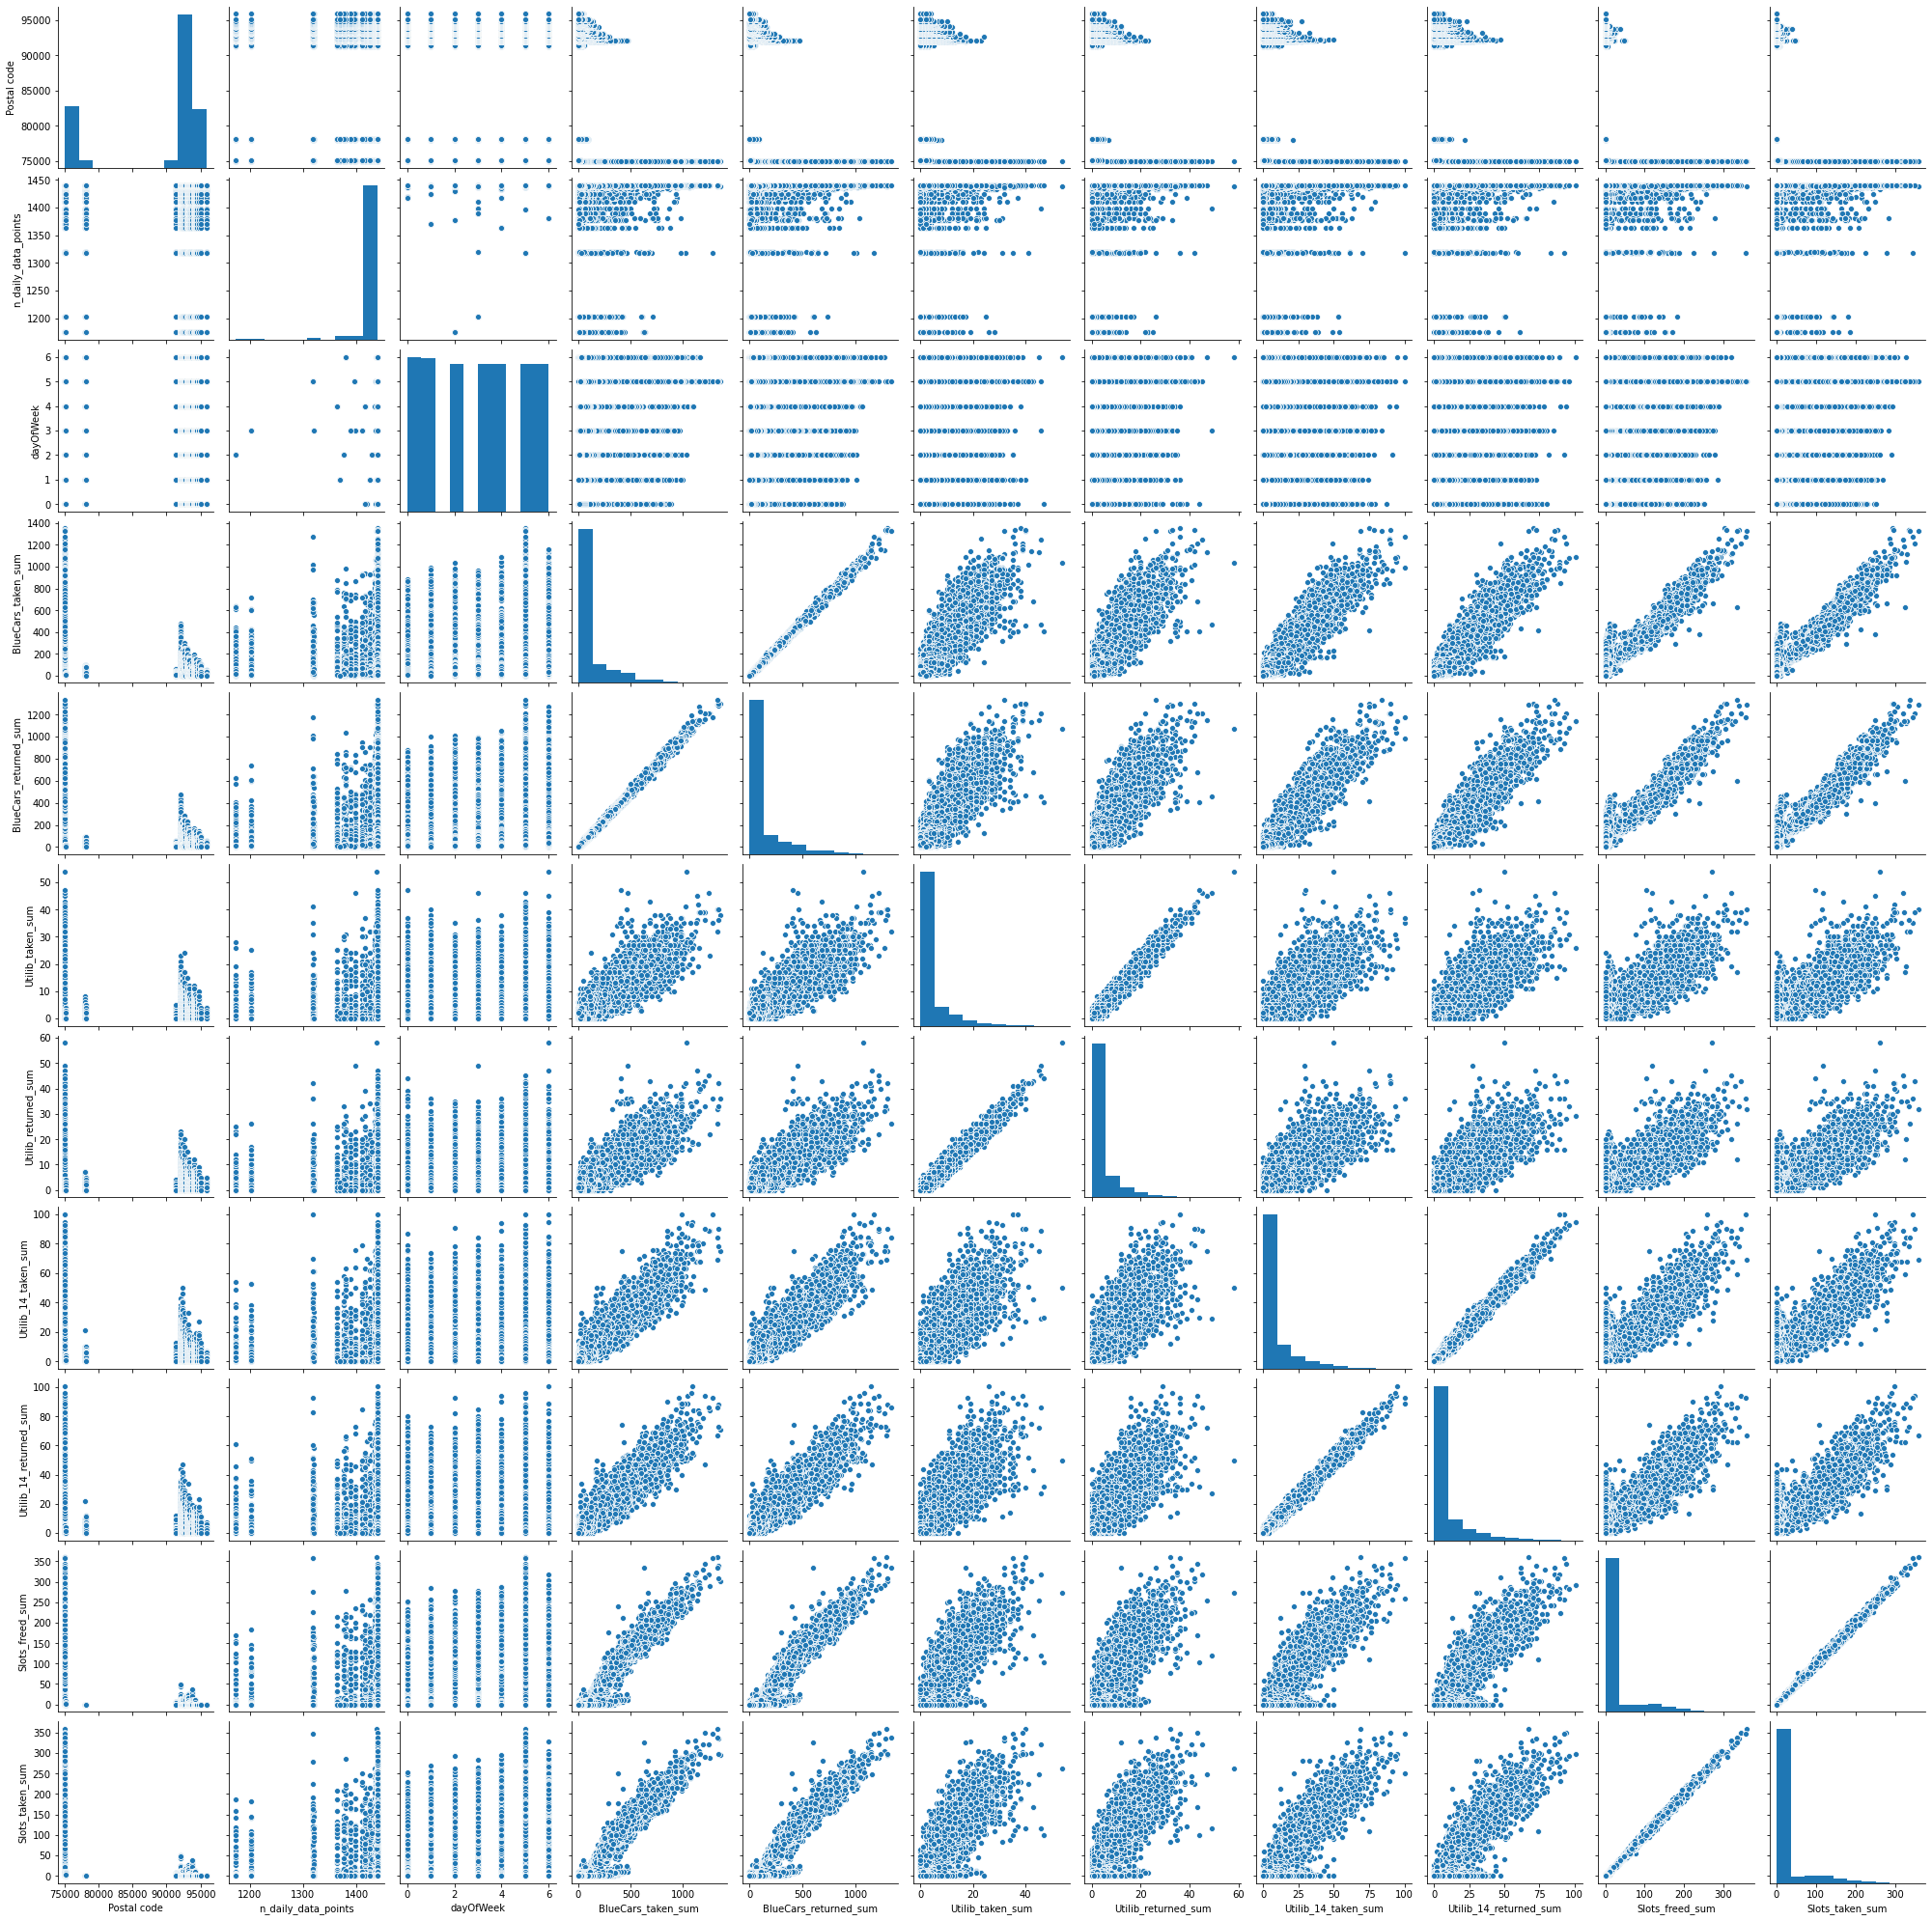

In [ ]:
# Plotting the bivariate summaries 
sns.pairplot(df)
plt.show()

- The above results reveal that most of the variables are positively correlated, 



> # 4. Hypothesis Testing 



In [ ]:
# crosstab for postal codes for blue cars taken sum
pd.crosstab(df["Postal code"], df.BlueCars_taken_sum.sum()).sample(15)

col_0,2025535
Postal code,
95870,156
75001,156
92420,155
75116,155
92170,156
93150,151
75013,156
92200,156
92140,156


In [ ]:

pd.crosstab(df["day_type"], df.day_type.count())

col_0,16085
day_type,
weekday,11544
weekend,4541


In [ ]:
pd.crosstab(df["date"], df.date.count())

col_0,16085
date,
1/1/2018,103
1/10/2018,103
1/11/2018,103
1/12/2018,103
1/13/2018,103
...,...
6/5/2018,104
6/6/2018,104
6/7/2018,104


In [ ]:
pd.crosstab(df['dayOfWeek'], df.day_type.count())

col_0,16085
dayOfWeek,
0,2374
1,2363
2,2268
3,2268
4,2271
5,2267
6,2274


# now, Let's test the hypoyhesis



> # 1):



Ho: No of cars taken over the weekdays is equal to the number of cars taken over the weekend

H1: No of cars taken over the weekdays is not equal to the number of cars taken over the

In [ ]:
# Ho: There is no significant difference btn the groups 
# H1: There is a significant difference btn the groups

## creating 2 groups
a1 = df[df['day_type']=='weekday'].sample(4500)
b = df[df['day_type']!='weekday'].sample(4500)     # "!= weekday" is equal to "==weekend"
b.sample(9)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
8113,92350,1/14/2018,1440,6,weekend,26,25,2,1,1,1,0,0
5849,92190,3/25/2018,1380,6,weekend,78,86,4,4,4,2,0,0
3701,78140,4/28/2018,1440,5,weekend,31,28,0,0,1,1,0,0
7474,92300,6/9/2018,1440,5,weekend,227,229,4,4,50,47,0,0
10833,93200,5/5/2018,1440,5,weekend,16,29,2,3,1,1,0,0
2367,75016,1/28/2018,1440,6,weekend,847,890,28,26,80,77,205,210
9631,92600,5/27/2018,1440,6,weekend,250,266,8,10,17,20,0,0
11605,93350,4/28/2018,1440,5,weekend,14,15,1,1,1,2,2,2
3607,78140,1/21/2018,1440,6,weekend,22,25,1,0,5,3,0,0


In [ ]:
ztest ,pval = stests.ztest(a1['BlueCars_taken_sum'], x2=b['BlueCars_taken_sum'], value=0, alternative='two-sided')

print("p-value is:", pval)

if pval<0.05:
  print("Since the p-value is <5%, we reject the null hypothesis")
else:
  print("Since the p-value is >5%, we fail to reject the null hypothesis")

p-value is: 6.551955304596516e-17
Since the p-value is <5%, we reject the null hypothesis


first we test the hypothesis using one variable i.e the blue cars, and here since the P-value is less than alpha, we reject the null hypothesis and conclude that at alpha= 0.05, the number of blue cars taken and returned during the weekdays is not equal to the number of blue cars taken and returned during the weekends

In [ ]:
# looping through all columns

for column in df.columns[5:]:
    ztest ,pval = stests.ztest(a1[column], x2=b[column], value=0, alternative='two-sided')
    print("p-value is:", pval)
    if pval<0.05:
        print("for", column, ':', "Since the p-value is <5%, we reject the null hypothesis")
    else:
        print("for", column, ":", "Since the p-value is >5%, we fail to reject the null hypothesis")

p-value is: 6.551955304596516e-17
for BlueCars_taken_sum : Since the p-value is <5%, we reject the null hypothesis
p-value is: 6.6110909615028775e-18
for BlueCars_returned_sum : Since the p-value is <5%, we reject the null hypothesis
p-value is: 1.44095085652794e-12
for Utilib_taken_sum : Since the p-value is <5%, we reject the null hypothesis
p-value is: 1.2409349666406122e-12
for Utilib_returned_sum : Since the p-value is <5%, we reject the null hypothesis
p-value is: 8.851476845786783e-14
for Utilib_14_taken_sum : Since the p-value is <5%, we reject the null hypothesis
p-value is: 1.534740070852612e-14
for Utilib_14_returned_sum : Since the p-value is <5%, we reject the null hypothesis
p-value is: 4.658046298143671e-07
for Slots_freed_sum : Since the p-value is <5%, we reject the null hypothesis
p-value is: 3.486671789024589e-07
for Slots_taken_sum : Since the p-value is <5%, we reject the null hypothesis


* Now looping through all columns(numerical columns from index 5), it is found that the p-value is less than alpha(0.05) for all vriables, hence we reject the null hypothesis and conclude that, at alpha= 0.05 the number of cars takena and returned during the weekdays is not equal to the number of cars taken and returned during the weekends.



In [ ]:
#we create a list of all the ccolumns and respective p-values
my_list = []

for column in df.columns[5:]:
    ztest ,pval = stests.ztest(a1[column], x2=b[column], value=0, alternative='two-sided')
    my_list.append(column)
    my_list.append(pval)
        
my_list

['BlueCars_taken_sum',
 6.551955304596516e-17,
 'BlueCars_returned_sum',
 6.6110909615028775e-18,
 'Utilib_taken_sum',
 1.44095085652794e-12,
 'Utilib_returned_sum',
 1.2409349666406122e-12,
 'Utilib_14_taken_sum',
 8.851476845786783e-14,
 'Utilib_14_returned_sum',
 1.534740070852612e-14,
 'Slots_freed_sum',
 4.658046298143671e-07,
 'Slots_taken_sum',
 3.486671789024589e-07]

In [ ]:
#Convert the list to a dictionary to make it easier to convert to a dictionary

def Convert(a): 
    ita = iter(my_list) 
    res_dct = dict(zip(ita, ita)) 
    return res_dct 

my_dict = Convert(my_list)
my_dict

{'BlueCars_returned_sum': 6.6110909615028775e-18,
 'BlueCars_taken_sum': 6.551955304596516e-17,
 'Slots_freed_sum': 4.658046298143671e-07,
 'Slots_taken_sum': 3.486671789024589e-07,
 'Utilib_14_returned_sum': 1.534740070852612e-14,
 'Utilib_14_taken_sum': 8.851476845786783e-14,
 'Utilib_returned_sum': 1.2409349666406122e-12,
 'Utilib_taken_sum': 1.44095085652794e-12}

In [56]:
res = pd.DataFrame(my_dict.items(), columns=['Question', 'P-value'])
#Create a conclusion column

res['Conclusion'] = res.apply(lambda row: 'No of cars taken and returned not equal ' if row['P-value']<0.05 else 'No of cars taken and returned equal', axis=1)

res

,Question,P-value,Conclusion
0,BlueCars_taken_sum,6.551955e-17,No of cars taken and returned not equal
1,BlueCars_returned_sum,6.611091e-18,No of cars taken and returned not equal
2,Utilib_taken_sum,1.440951e-12,No of cars taken and returned not equal
3,Utilib_returned_sum,1.240935e-12,No of cars taken and returned not equal
4,Utilib_14_taken_sum,8.851477e-14,No of cars taken and returned not equal
5,Utilib_14_returned_sum,1.534740e-14,No of cars taken and returned not equal
6,Slots_freed_sum,4.658046e-07,No of cars taken and returned not equal
7,Slots_taken_sum,3.486672e-07,No of cars taken and returned not equal




> 2);




Ho: No of cars taken and received in the first two days <= No of cars taken and received in the last two days

H1: No of cars taken and received in the first two days > No of cars taken and received in the last two days respectively.

In [47]:
# Ho: There is no significant difference btn the groups 
# H1: There is a significant difference btn the groups

## creating 2 groups
a2 = df[df['dayOfWeek']<=1].sample(2000)
b2 = df[df['dayOfWeek'] > 4].sample(2000)     # "!= weekday" is equal to "==weekend"
b2.sample(9)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
6784,92250,3/24/2018,1440,5,weekend,92,87,5,4,4,5,4,3
1207,75008,4/29/2018,1440,6,weekend,371,355,7,8,10,9,91,85
6094,92210,1/14/2018,1440,6,weekend,129,110,1,3,5,5,4,3
378,75003,3/11/2018,1440,6,weekend,340,329,11,9,29,29,91,88
629,75005,1/6/2018,1437,5,weekend,397,407,7,6,28,29,111,113
1140,75008,2/18/2018,1438,6,weekend,383,368,8,9,13,13,130,120
1362,75009,4/28/2018,1440,5,weekend,371,402,9,10,14,14,91,97
7831,92330,2/4/2018,1440,6,weekend,47,46,2,3,2,1,2,1
9526,92600,1/28/2018,1440,6,weekend,220,232,5,7,11,13,0,0


In [55]:
for column in df.columns[5:]:
    ztest ,pval = stests.ztest(a2[column], x2=b2[column], value=0, alternative='two-sided')
    print("p-value is:", pval)
    if pval>0.05:
        print("for", column, ':', "Since the p-value is >5%, we reject the null hypothesis")
    else:
        print("for", column, ":", "Since the p-value is <5%, we fail to reject the null hypothesis")

p-value is: 1.5619541905396755e-10
for BlueCars_taken_sum : Since the p-value is <5%, we fail to reject the null hypothesis
p-value is: 3.578876968774813e-11
for BlueCars_returned_sum : Since the p-value is <5%, we fail to reject the null hypothesis
p-value is: 2.2354122633558027e-07
for Utilib_taken_sum : Since the p-value is <5%, we fail to reject the null hypothesis
p-value is: 1.4706118081953922e-07
for Utilib_returned_sum : Since the p-value is <5%, we fail to reject the null hypothesis
p-value is: 1.4538597435165133e-07
for Utilib_14_taken_sum : Since the p-value is <5%, we fail to reject the null hypothesis
p-value is: 7.660251809744901e-08
for Utilib_14_returned_sum : Since the p-value is <5%, we fail to reject the null hypothesis
p-value is: 0.0002095334496117892
for Slots_freed_sum : Since the p-value is <5%, we fail to reject the null hypothesis
p-value is: 0.00014158048094768812
for Slots_taken_sum : Since the p-value is <5%, we fail to reject the null hypothesis


- For all the columns, the P-value is less than 0.05 hence we fail to reject the null hypothesis and conclude that at alpha=0.05, the number of cars taken and returned over the weekdays is less or equal to the number of cars taken and retuned over the weekends. 